https://aclanthology.org/C10-3004.pdf

https://www.ltp-cloud.com

@article{che2020n,
  title={N-LTP: A Open-source Neural Chinese Language Technology Platform with Pretrained Models},
  author={Che, Wanxiang and Feng, Yunlong and Qin, Libo and Liu, Ting},
  journal={arXiv preprint arXiv:2009.11616},
  year={2020}
}



# LTP

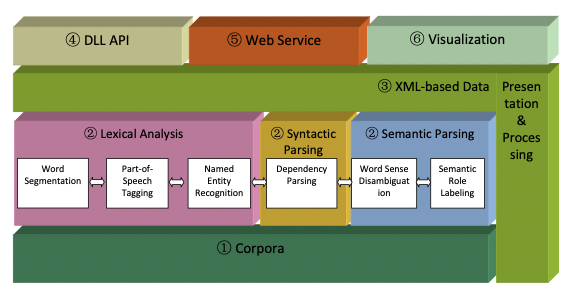

# Introduction

LTP (Language Technology Platform) is an integrated Chinese processing platform which includes a suite of high performance natural language processing (NLP) modules and relevant corpora. 

Especially for the syntactic and semantic parsing modules, we achieved good results in some relevant evaluations, such as CoNLL and SemEval. 

Based on XML internal data representation, users can easily use these modules and corpora by invoking DLL (Dynamic Link Library) or Web service APIs (Application Program Interface), and view the processing results directly by the visualization tool.

## Corpora

### WordMap

WordMap is a Chinese thesaurus which contains 100,093 words. 

In WordMap, each word sense belongs to a five-level categories. There are 12 top, about 100 second and 1,500 third level, and more fourth and fifth level categories.

### CDP (Chinese Dependency Treebank)



It is annotated with the dependency structure and contains 24 dependency relation tags, such as SUB, OBJ, and ADV. 

It consists of 10,000 sentences randomly extracted from the first six-month corpus of People’s Daily (China) in 1998, which has been annotated with lexical tags, including word segmentation, part-of-speech tagging, and named entity recognition tags.

## Chinese Processing Module

1. Word Segmentation

2. Part-of-Speech Tagging (POSTag)

3. Named Entity Recognition

4. Word Sense Disambiguation

5. Syntactic Parsing (Parser)

6. Semantic Role Labeling

### Dependency Parsing

By analyzing the dependency relations between language components, dependency parsing reveals its syntactic structure. 

Intuitively, DP identifies "subject-verb", "adverbial" and other grammatical structure and analyzes the relationship between different components in a sentence. 

As the example above, the analysis result is: 

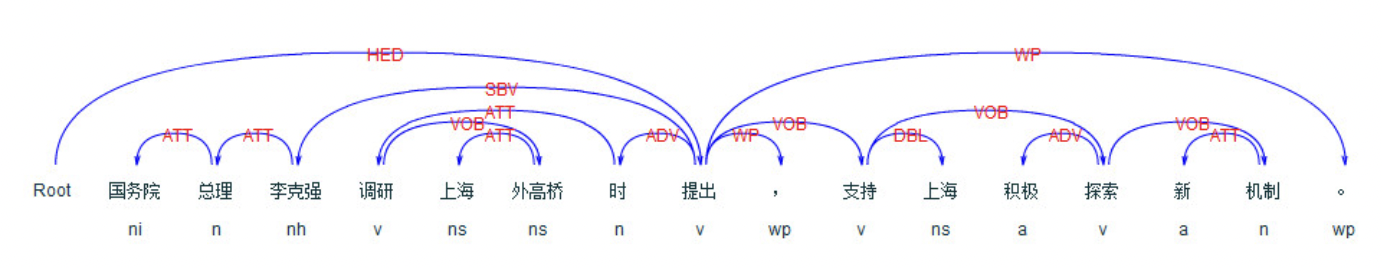

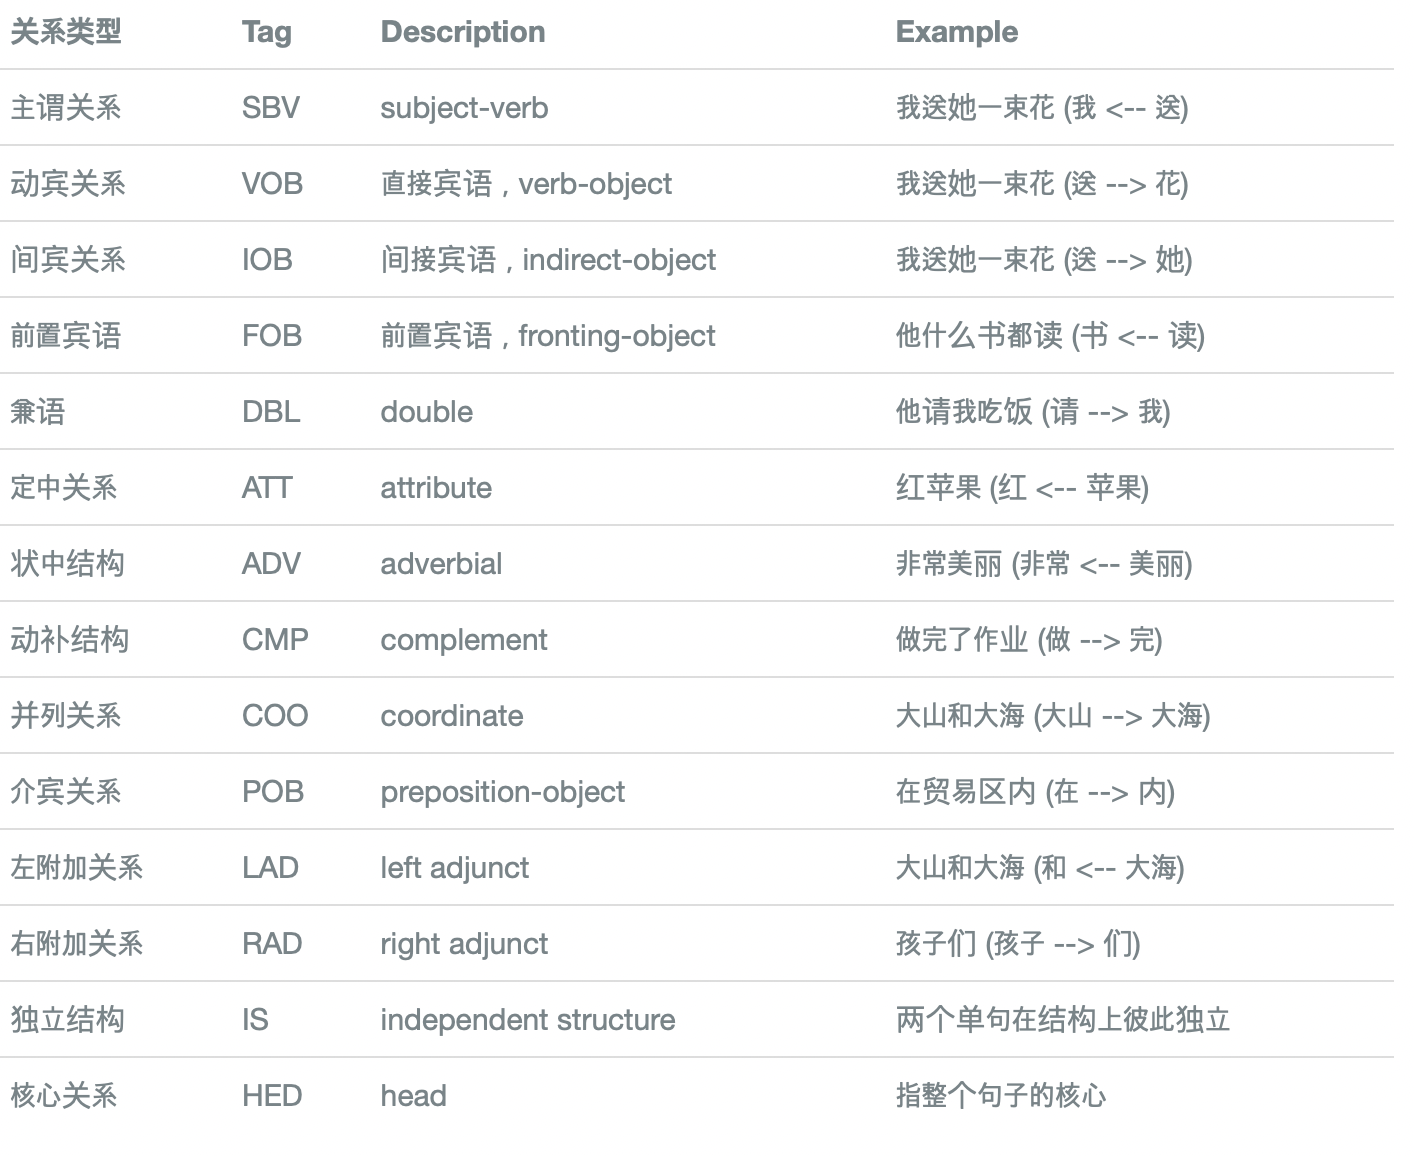

### Semantic Dependency Parsing

Given a complete sentence, semantic dependency parsing (SDP) aims at determining all the word pairs related to each other semantically and assigning specific predefined semantic relations, which is a projective tree structure now and will be expanded to directed acyclic graphs.

Semantic dependency analysis represents the meaning of sentences by a collection of dependency word pairs and their corresponding relations. 

This procedure survives from syntactic variation.

Here are three sentences:

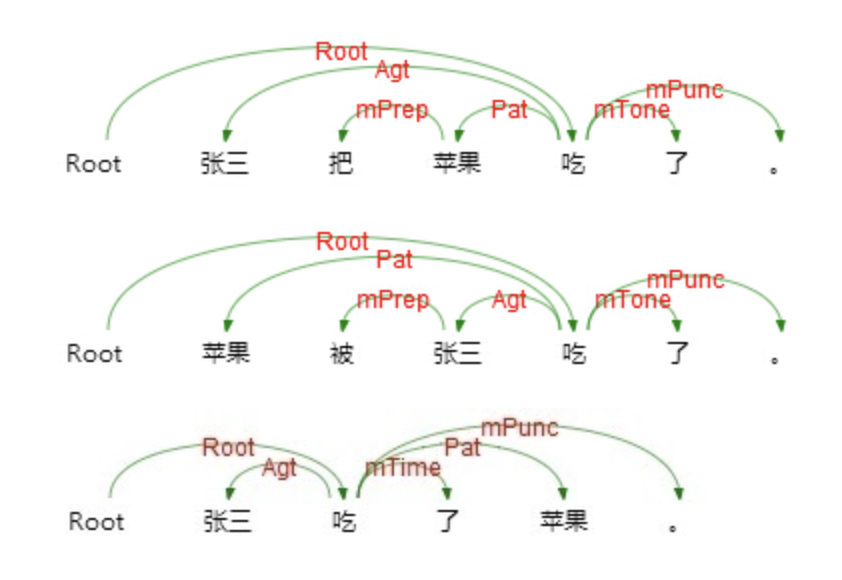

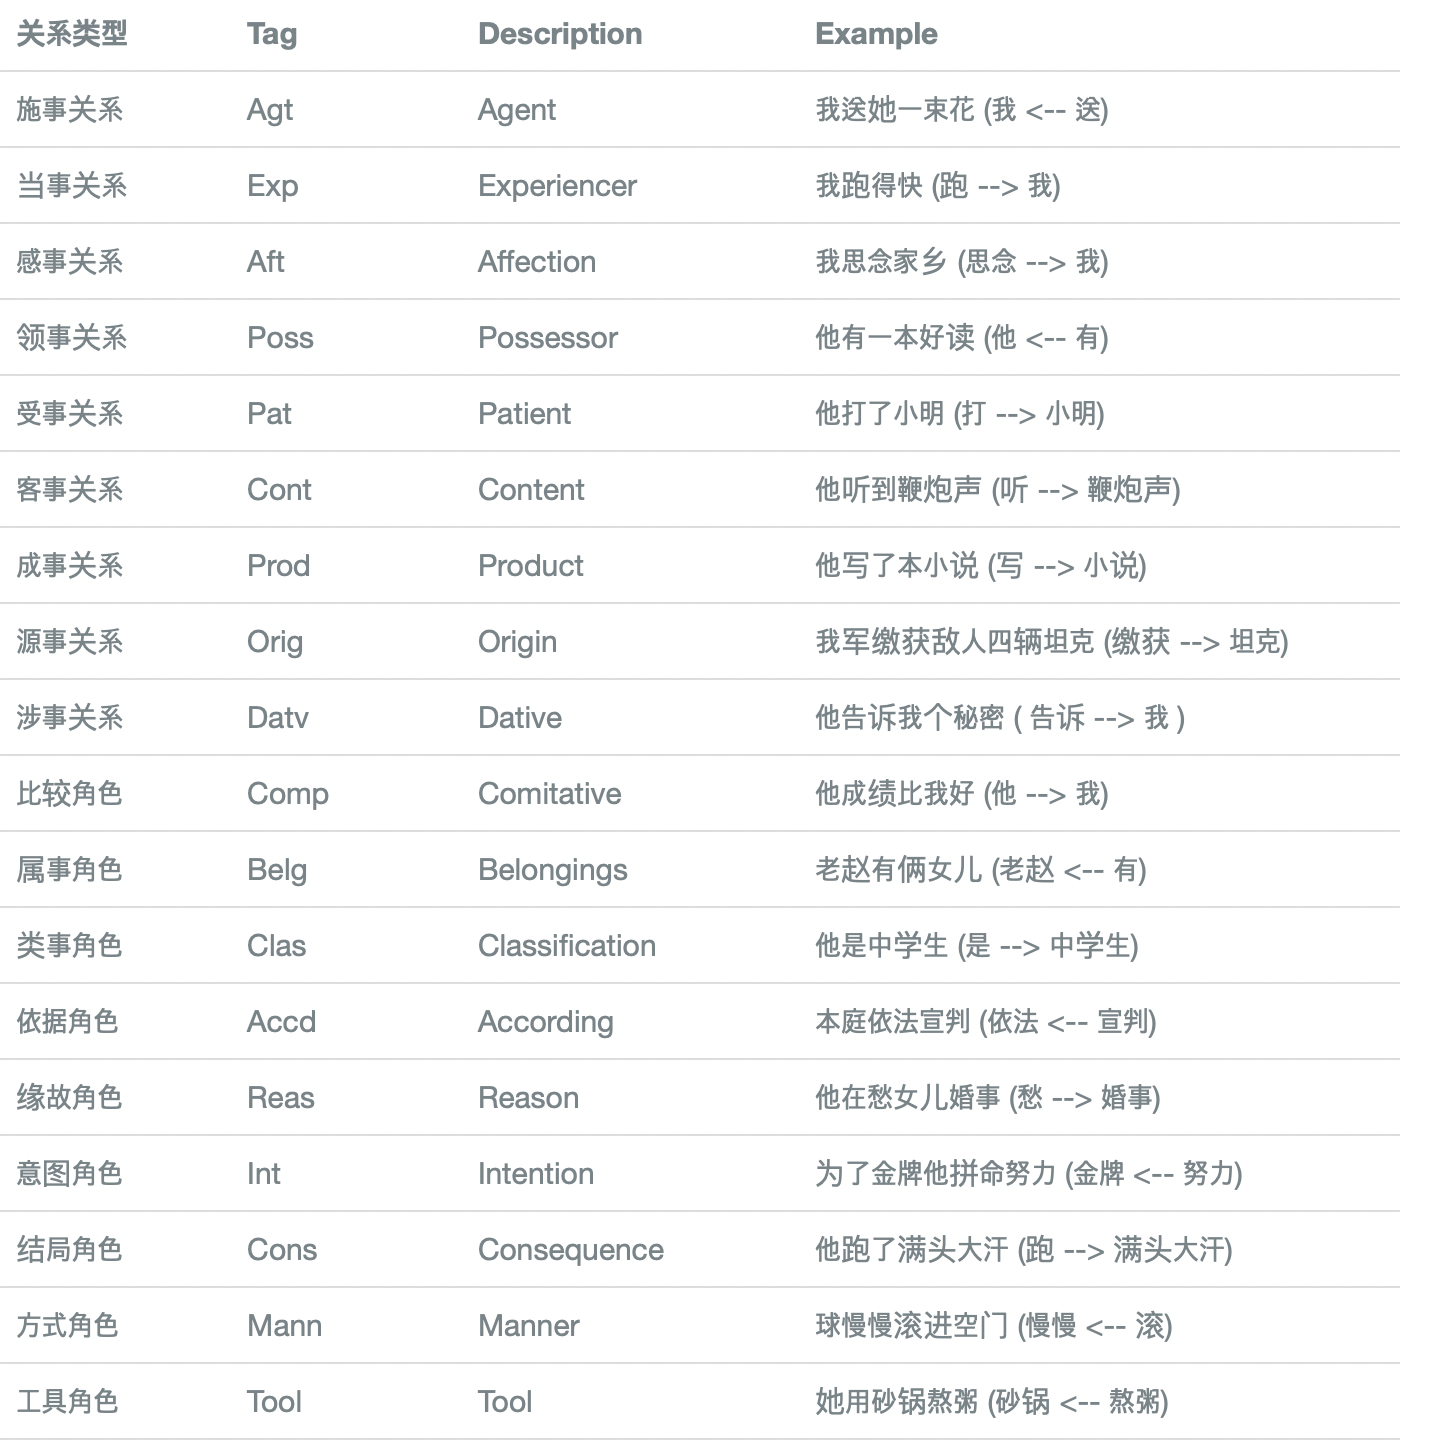

### comparison
From the comparison, we can conclude two points, the first one is syntactic dependencies put emphasis on non-entity words for their roles in partitioning the sentence structures. 

The second one is that the totally different dependency relations make SDP could represent the detail semantics. SDP can be used to answer the questions raised from the sentences, such as all the Wh-Questions. However, DP could not.

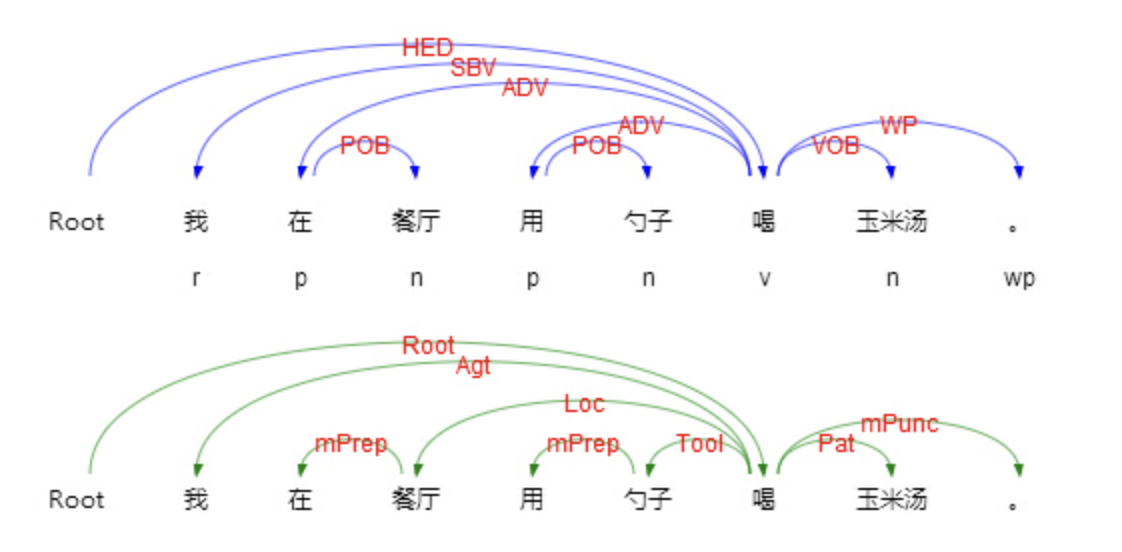


In [1]:
!pip install transformers==4.1.1
!pip install ltp

     |████████████████████████████████| 1.5 MB 5.1 MB/s 
     |████████████████████████████████| 2.9 MB 43.1 MB/s 
     |████████████████████████████████| 895 kB 67.4 MB/s 
     |████████████████████████████████| 94 kB 1.9 MB/s 
  Created wheel for pygtrie: filename=pygtrie-2.4.2-py3-none-any.whl size=19062 sha256=4736a056fb35130ca4b2dd41b42f4f9a147038297ee170093e8bc86edd10c74f
  Stored in directory: /root/.cache/pip/wheels/d3/f8/ba/1d828b1603ea422686eb694253a43cb3a5901ea4696c1e0603
Successfully built pygtrie


In [2]:
from ltp import LTP

ltp = LTP()  # 默认加载 Small 模型
seg, hidden = ltp.seg(["他叫汤姆去拿外衣。"])
pos = ltp.pos(hidden)
ner = ltp.ner(hidden)
srl = ltp.srl(hidden)
dep = ltp.dep(hidden)
sdp = ltp.sdp(hidden)

Downloading:   0%|          | 0.00/164M [00:00<?, ?B/s]

문장 나누기

In [3]:
from ltp import LTP
ltp = LTP()
sents = ltp.sent_split(["他叫汤姆去拿外衣。", "汤姆生病了。他去了医院。"])
sents

['他叫汤姆去拿外衣。', '汤姆生病了。', '他去了医院。']

단어 나누기

In [4]:
from ltp import LTP

ltp = LTP()

segment, _ = ltp.seg(["他叫汤姆去拿外衣。"])

# 对于已经分词的数据
segment, hidden = ltp.seg(["他/叫/汤姆/去/拿/外衣/。".split('/')], is_preseged=True)
segment

[['他', '叫', '汤姆', '去', '拿', '外衣', '。']]

## POS

In [9]:
from ltp import LTP

ltp = LTP()

seg, hidden = ltp.seg(["他叫汤姆去拿外衣。"])
pos = ltp.pos(hidden)
print(seg)
print(pos)

[['他', '叫', '汤姆', '去', '拿', '外衣', '。']]
[['r', 'v', 'nh', 'v', 'v', 'n', 'wp']]


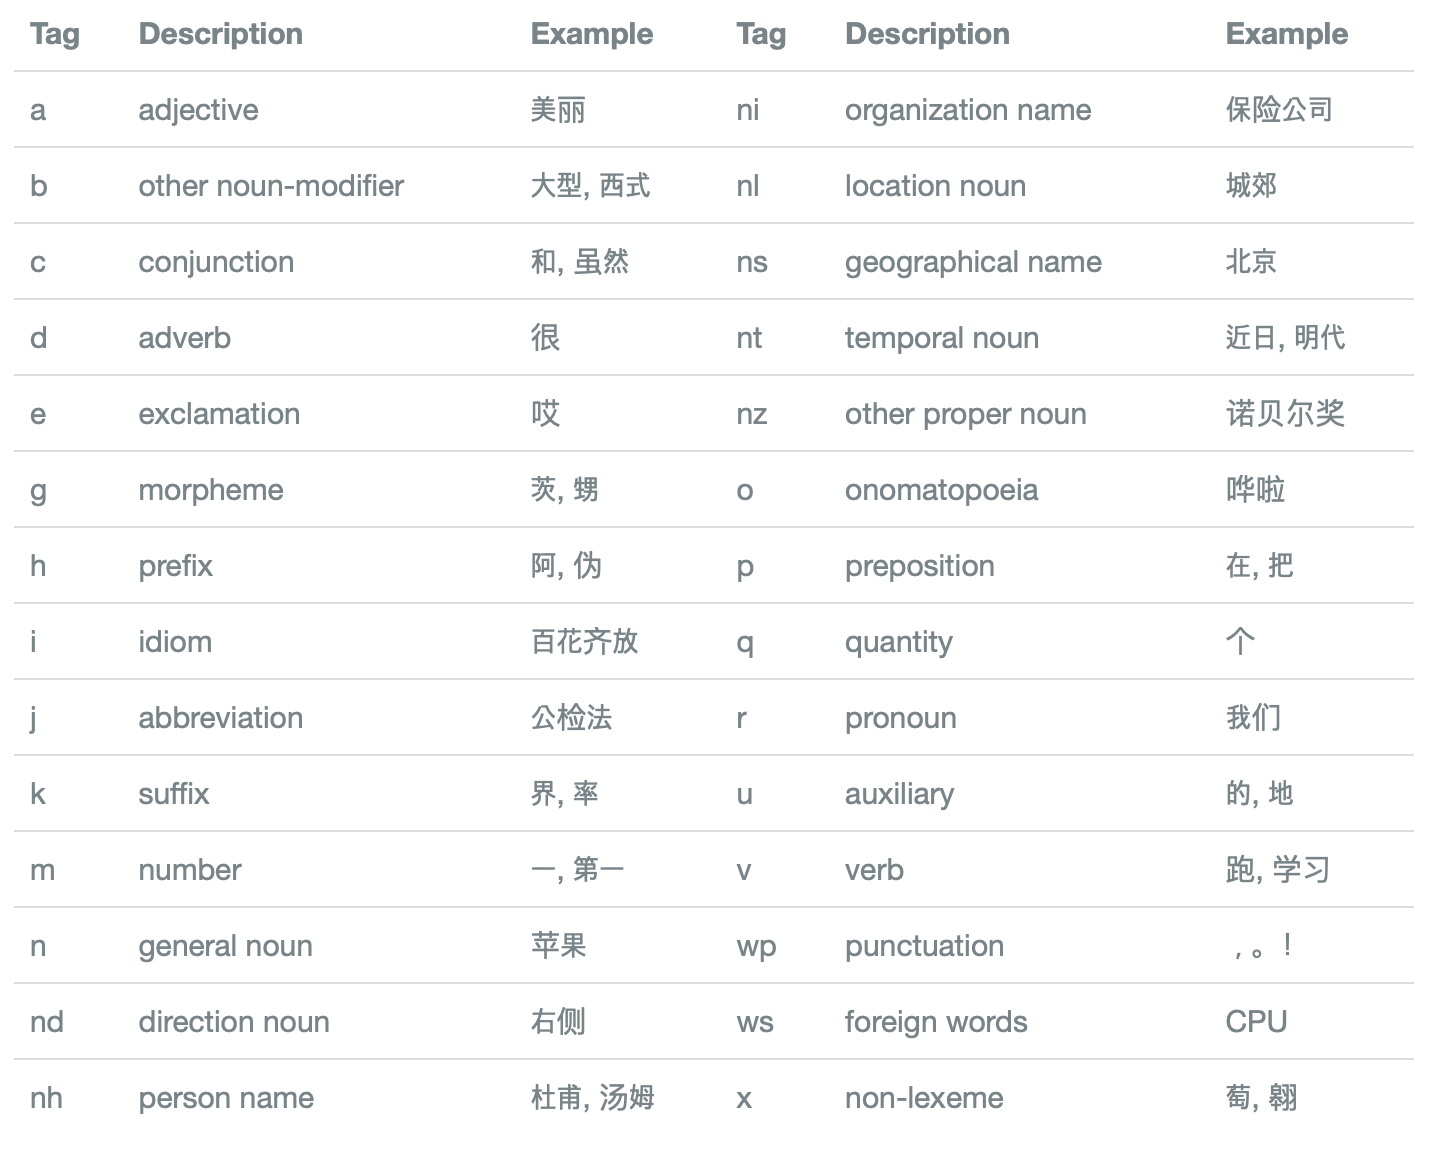

## NER

In [10]:
from ltp import LTP

ltp = LTP()

seg, hidden = ltp.seg(["他叫汤姆去拿外衣。"])
ner = ltp.ner(hidden)

tag, start, end = ner[0][0]
print(seg)
print(ner)
print(tag,":", "".join(seg[0][start:end + 1]))

[['他', '叫', '汤姆', '去', '拿', '外衣', '。']]
[[('Nh', 2, 2)]]
Nh : 汤姆


## DEP

In [12]:
from ltp import LTP

ltp = LTP()

seg, hidden = ltp.seg(["他叫汤姆去拿外衣。"])
dep = ltp.dep(hidden)
print(seg)
dep

[['他', '叫', '汤姆', '去', '拿', '外衣', '。']]


[[(1, 2, 'SBV'),
  (2, 0, 'HED'),
  (3, 2, 'DBL'),
  (4, 5, 'ADV'),
  (5, 2, 'VOB'),
  (6, 5, 'VOB'),
  (7, 2, 'WP')]]

## SDP

In [8]:
from ltp import LTP

ltp = LTP()

seg, hidden = ltp.seg(["他叫汤姆去拿外衣。"])
sdp = ltp.sdp(hidden, mode='tree')
sdp

[[(1, 2, 'AGT'),
  (2, 0, 'Root'),
  (3, 2, 'DATV'),
  (4, 2, 'eSUCC'),
  (5, 4, 'eSUCC'),
  (6, 5, 'PAT'),
  (7, 2, 'mPUNC')]]